# Call classes

In [1]:
from data_mining import integration, selection, visualization

# Integration Process
#### This part contains the integration process by calling the integration class (note should only be called once, but if accidentally run, we built an error handler.)

In [2]:
x = integration('valorant_games.csv')
x.create_table_load_data('valorant.db')

UNIQUE constraint failed: players.player_id
Failed to integrate data to database.


# Selection Processes
#### This part contains all the call from the database using a class

In [3]:
# call class for the database
x = selection("valorant.db")
# print schema
x.schema()

CREATE TABLE IF NOT EXISTS players(
    player_id INTEGER NOT NULL PRIMARY KEY,
    p_name TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS teams(
    team_id INTEGER NOT NULL PRIMARY KEY,
    t_name TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS agents(
    agent_id INTEGER NOT NULL PRIMARY KEY,
    agent TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS matches(
    match_id INTEGER NOT NULL PRIMARY KEY,
    match_datetime TEXT NOT NULL,
    match_map TEXT NOT NULL,
    team_id1 INTEGER NOT NULL,
    team_id2 INTEGER NOT NULL,
    team1_score INTEGER NOT NULL,
    team2_score INTEGER NOT NULL,
    game_patch FLOAT NOT NULL,
    FOREIGN KEY(team_id1) REFERENCES teams(team_id),
    FOREIGN KEY(team_id2) REFERENCES teams(team_id)
);

CREATE TABLE IF NOT EXISTS player_match_stats(
    rating FLOAT NOT NULL,
    rating_attackers FLOAT NOT NULL,
    rating_defenders FLOAT NOT NULL,
    average_combat_score INTEGER NOT NULL,
    average_combat_score_t INTEGER NOT NULL,
    average_combat_score_ct INTE

In [4]:

data = x.get_data("""
SELECT SUM(player_match_stats.kills) AS total_kills, players.p_name
FROM player_match_stats
JOIN players
ON player_match_stats.player_id = players.player_id 
GROUP BY players.p_name
ORDER BY total_kills DESC 
LIMIT 10;
""")

In [5]:
data.head()

,total_kills,p_name
0,7966,rawfiul
1,5774,Antidote
2,5728,ScrewFace
3,5650,Excali
4,5562,koalanoob


In [6]:
hs_percentage = x.get_data("""
                           SELECT AVG(player_match_stats.headshot) * 100 AS total_hs, players.p_name
                           FROM player_match_stats
                            JOIN players
                            ON player_match_stats.player_id = players.player_id
                            JOIN teams
                            ON player_match_stats.team_id = teams.team_id
                            WHERE teams.t_name = "T1"
                            GROUP BY players.p_name
                            ORDER BY total_hs DESC
                            """)

In [7]:
hs_percentage.head(30)

,total_hs,p_name
0,34.250000,brax
1,27.370370,pwny
2,25.361111,curry
3,24.583333,dynamic
4,24.500000,Sayaplayer
5,24.000000,ban
6,23.857143,thwifo
7,23.000000,iNTRO
8,23.000000,Carpe
9,22.607143,steel


In [8]:
brax = x.get_data("""
                    SELECT DISTINCT players.p_name, teams.t_name
                    FROM players
                    JOIN player_match_stats
                    ON players.player_id = player_match_stats.player_id
                    JOIN teams
                    ON player_match_stats.team_id = teams.team_id
                    WHERE teams.t_name = "T1"
                    """)

In [9]:
brax.head(30)

,p_name,t_name
0,Sayaplayer,T1
1,Carpe,T1
2,xeta,T1
3,Munchkin,T1
4,ban,T1
5,iNTRO,T1
6,dynamic,T1
7,pwny,T1
8,thwifo,T1
9,curry,T1


# Visualization or Knowledge Presentation
#### This part contains all the visualization or presentation of pattern seen in the data

In [10]:
vis = visualization()

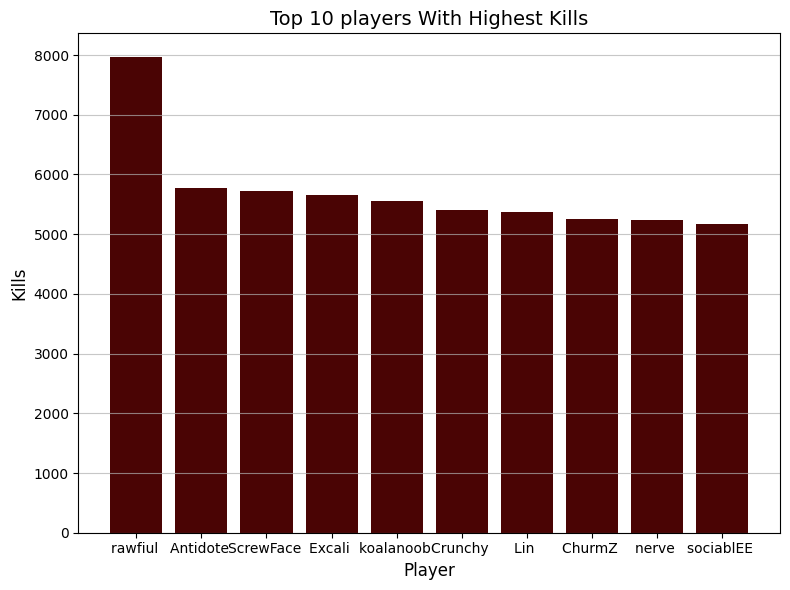

In [11]:
vis.top(df=data, dfx='p_name', dfy='total_kills', x_name='Player', y_name='Kills', title="Top 10 players With Highest Kills", color="#4A0404")

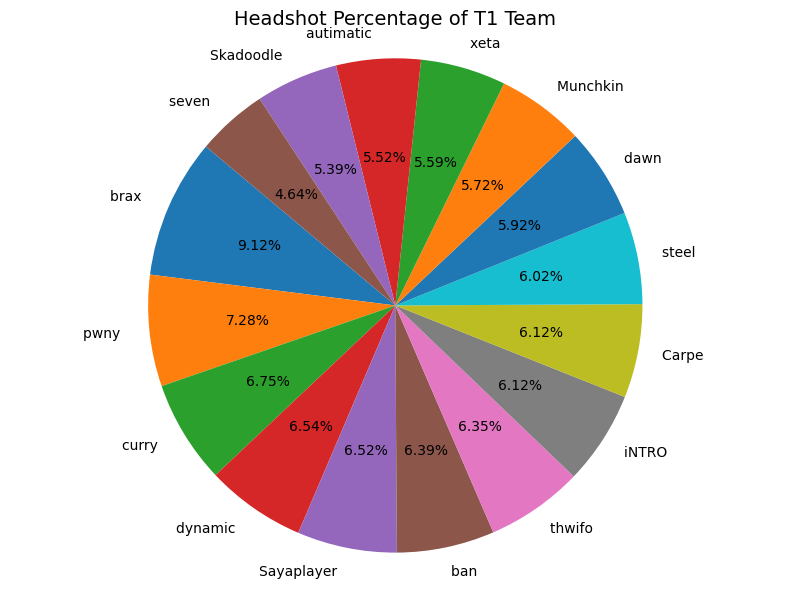

In [12]:
vis.pie(df=hs_percentage, dfx='p_name', dfy='total_hs', title="Headshot Percentage of T1 Team")